# [ PART 03. 통계분석 ] - 6장. 회귀분석

## 단순선형회귀분석

In [1]:
# 데이터 로드 및 확인
library(MASS)
data("Cars93")
str(Cars93)

'data.frame':	93 obs. of  27 variables:
 $ Manufacturer      : Factor w/ 32 levels "Acura","Audi",..: 1 1 2 2 3 4 4 4 4 5 ...
 $ Model             : Factor w/ 93 levels "100","190E","240",..: 49 56 9 1 6 24 54 74 73 35 ...
 $ Type              : Factor w/ 6 levels "Compact","Large",..: 4 3 1 3 3 3 2 2 3 2 ...
 $ Min.Price         : num  12.9 29.2 25.9 30.8 23.7 14.2 19.9 22.6 26.3 33 ...
 $ Price             : num  15.9 33.9 29.1 37.7 30 15.7 20.8 23.7 26.3 34.7 ...
 $ Max.Price         : num  18.8 38.7 32.3 44.6 36.2 17.3 21.7 24.9 26.3 36.3 ...
 $ MPG.city          : int  25 18 20 19 22 22 19 16 19 16 ...
 $ MPG.highway       : int  31 25 26 26 30 31 28 25 27 25 ...
 $ AirBags           : Factor w/ 3 levels "Driver & Passenger",..: 3 1 2 1 2 2 2 2 2 2 ...
 $ DriveTrain        : Factor w/ 3 levels "4WD","Front",..: 2 2 2 2 3 2 2 3 2 2 ...
 $ Cylinders         : Factor w/ 6 levels "3","4","5","6",..: 2 4 4 4 2 2 4 4 4 5 ...
 $ EngineSize        : num  1.8 3.2 2.8 2.8 3.5 2.2 3.8 5.7 3.

In [2]:
# 단순 선형 회귀모형 생성
lm(Price~EngineSize, Cars93)


Call:
lm(formula = Price ~ EngineSize, data = Cars93)

Coefficients:
(Intercept)   EngineSize  
      4.669        5.563  


In [3]:
# 모형 살펴보기 : summary() 이용
# summary() : 주어진 인자에 대한 요약 정보 산출
Cars93_lm <- lm(Price~EngineSize, Cars93)
summary(Cars93_lm)


Call:
lm(formula = Price ~ EngineSize, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.684  -4.627  -1.795   2.592  39.429 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.6692     2.2390   2.085   0.0398 *  
EngineSize    5.5629     0.7828   7.107 2.59e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.789 on 91 degrees of freedom
Multiple R-squared:  0.3569,	Adjusted R-squared:  0.3499 
F-statistic: 50.51 on 1 and 91 DF,  p-value: 2.588e-10


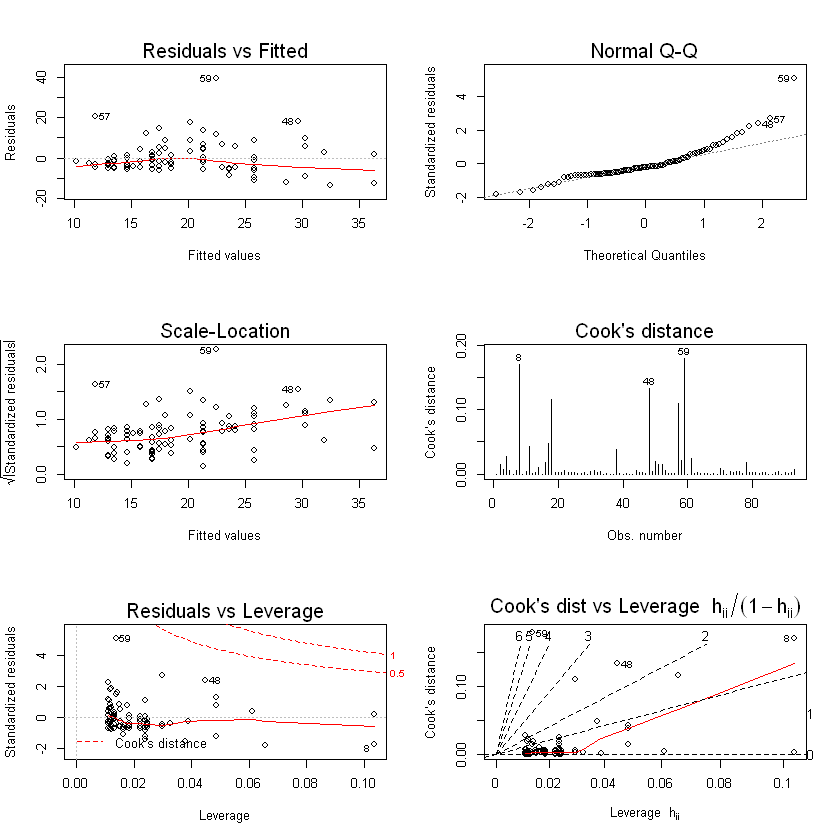

In [6]:
##### 4. R을 이용한 선형회귀모형 진단
## Q) 위 예제에서 생성한 선형회귀모델 Cars93_lm을 평가할 수 있는 
## 다양한 그래프를 생성한 후 해석해보자.

##===== A)
# 2x3 형태로 그래프를 배치하기 위해 화면 조정 
par(mfrow=c(3,2))

# 그래프 생성
plot(Cars93_lm, which=c(1:6))

In [ ]:
##### 5. 선형회귀모형을 활용한 예측
## Q) MASS패키지에서 제공하는 Cars93 데이터의 엔진크기(EngineSize)를 독립변수, 
## 가격(Price)를 종속변수로 설정하여 회귀모형을 생성한 후, Cars93 데이터의 5개 행을 랜덤으로 뽑아 가격(Price)을 예측해보자. 
## 예측 시 predict 함수의 interval 인자값을 조정하며 그 결과를 비교해보자.

##===== A)
# 회귀모형 생성
Cars93_lm<-lm(Price~EngineSize, Cars93)

# 실습을 위해 시드값 설정
set.seed(1234)

# Cars93 데이터에서 랜덤으로 6개의 행번호를 추출하여 idx변수에 저장
idx<-sample(1:nrow(Cars93),5)
idx

# 예측에 사용할 데이터셋 구성
test<-Cars93[idx,]

# 예측 수행1 (점추정)
predict.lm(Cars93_lm, test, interval="none")

# 예측 수행2 (회귀계수의 불확실성을 감안한 구간추정)
predict.lm(Cars93_lm, test, interval="confidence")

# 예측 수행3 (회귀계수의 불확실성과 오차항을 감안한 구간추정)
predict.lm(Cars93_lm, test, interval="prediction")

In [ ]:







##### 3절 | 다중선형회귀분석

##### 3. 더미변수(dummy variable)
## Q)  R에서 회귀모형을 생성하는 lm함수는 데이터에 범주형 변수가 포함되어 있을 경우, 
## 이를 자동으로 더미변수로 변환하여 회귀모형을 생성한다. 
## 이 과정을 더 자세히 이해하기 위해 범주형 변수(Spceies)가 포함된 iris데이터에서 
## Petal.Length를 종속변수로 두고 나머지 변수들을 독립변수로 설정한 회귀모형을 생성하고 그 결과를 살펴보자.

##===== A)
# 중회귀모형 생성 
# formula 인자값으로 여러개의 독립변수를 지정할 때 +기호로 연결
iris_lm<-lm(Petal.Length~Sepal.Length+Sepal.Width+Petal.Width+Species, iris)

# 모형 확인
summary(iris_lm)


##### 4. R을 이용한 다중회귀분석
## Q)  MASS패키지의 Cars93 데이터에서 엔진크기(EngineSize), RPM(RPM), 무게(Weight)를 독립변수로 설정하고 
## 자동차 가격(Price)를 종속변수로 설정하여 다변량 회귀분석을 수행한 뒤 그 결과를 해석해보자.

##===== A)
# 데이터 로드 및 확인
library(MASS)
str(Cars93)

# 다중회귀모형 생성 후 Price_lm 변수에 저장
Price_lm<-lm(Price~EngineSize+RPM+Weight, Cars93)

# 모형 요약정보 살펴보기
summary(Price_lm)



##### 5. 최적회귀방정식의 선택

## Q1) MASS 패키지의 Cars93 데이터에서 엔진크기(EngineSize), RPM(RPM), 너비(Width), 
## 길이(Length)를 독립변수로 가지고, 자동차의 가격(Price)을 종속변수로 가지는 선형회귀모형을 생성해보자. 
## 또한 변수 선택을 위한 함수를 사용하지 않고, 직접 후진 제거법을 수행하는 R코드를 살펴보며 
## 변수 선택법에 대해 정확하게 이해해보자.

##===== A)

## 1) 패키지 로드 및 다중회귀모형 생성
# 패키지 로드
library(MASS)

# 회귀모형을 생성한 후 lm_a 변수에 저장 
lm_a<-lm(Price ~ EngineSize + RPM + Width + Length, Cars93)

# 모형의 요약정보 확인
summary(lm_a)


## 2) 유의확률이 가장 높은 변수 Width를 제거하고 회귀모형(lm_b)을 다시 생성
# 회귀모형 lm_b 생성
lm_b<-lm(Price ~ EngineSize + RPM + Length, Cars93)

# 모형의 요약정보 확인
summary(lm_b)


## 3) 유의확률이 가장 높은 변수 Length를 제거하고 회귀모형(lm_c)을 다시 생성
# 회귀모형 lm_c 생성
lm_c<-lm(Price ~ EngineSize + RPM, Cars93)

# 모형의 요약정보 확인
summary(lm_c)



## Q2) MASS 패키지의 Cars93 데이터에서 엔진크기(EngineSize), 마력(Horsepower), RPM(RPM), 너비(Width), 
## 길이(Length), 무게(Weight)를 독립변수로 가지고, 자동차의 가격(Price)를 종속변수로 가지는 선형회귀모형을 생성해보자. 
## 그 후 step함수를 사용해 ‘후진제거법’으로 변수 선택을 수행한 후 결과를 해석해보자.

##===== A)
# 후진제거법을 활용한 변수선택
lm_result<-lm(Price~EngineSize+Horsepower+RPM+Width+Length+Weight, Cars93)
step(lm_result, direction="backward")





# (끝)
##===============================================================


